In [2]:
from google.colab import drive
drive. mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/cats_vs_dogs_small.zip","r") as dataset_zip:
    dataset_zip.extractall("/content")

In [4]:
import os
base_directory = "/content/cats_vs_dogs_small"
print( "Contents of the base directory:", os.listdir(base_directory))

Contents of the base directory: ['test', 'train', 'validation']


In [8]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 806.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 142.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 138.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.6 MB/s eta 0:00:00


In [10]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, applications

# Setting the correct paths for training, validation, and testing directories

training_directory = '/content/cats_vs_dogs_small/train'
validation_directory = '/content/cats_vs_dogs_small/validation'
testing_directory = '/content/cats_vs_dogs_small/test'

In [ ]:
pip install tensorflow

In [11]:
# Importing the training, validation, and testing datasets from respective directories

ds_train = keras.preprocessing.image_dataset_from_directory(
    training_directory,
    image_size=(180, 180),
    batch_size=32)

ds_val = keras.preprocessing.image_dataset_from_directory(
    validation_directory,
    image_size=(180, 180),
    batch_size=32)

ds_test = keras.preprocessing.image_dataset_from_directory(
    testing_directory,
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [12]:
# Displaying a few sample images from the dataset

def show_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, model_labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))


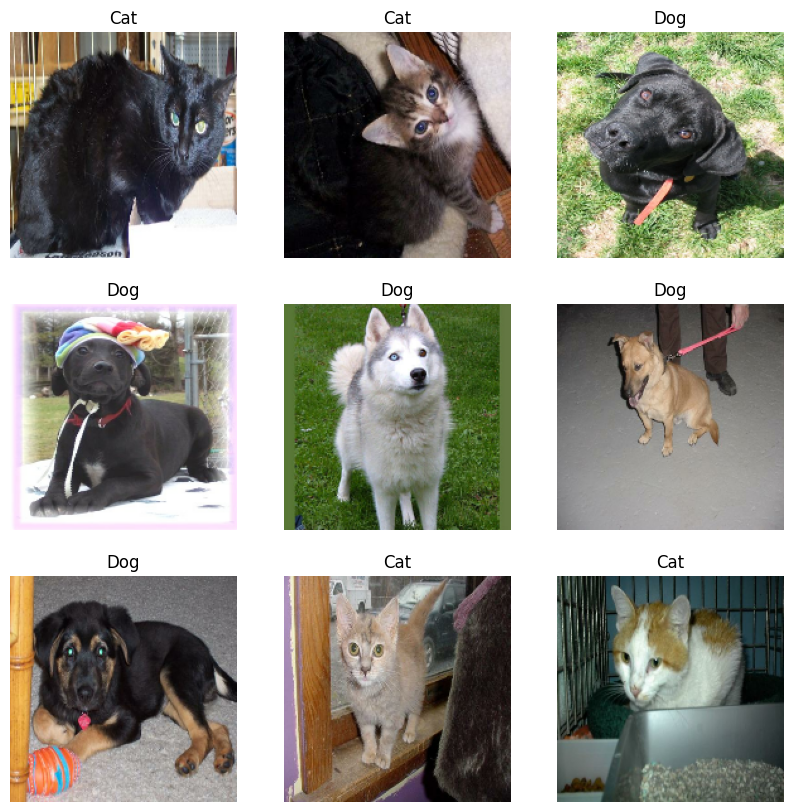

In [13]:
# Visualizing sample images from the training dataset

def show_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, model_labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title("Cat" if model_labels[i] == 0 else "Dog")
            plt.axis("off")
    plt.show()

# Calling the function to display sample images

show_images(ds_train)


In [14]:
# Building a convolutional neural network (CNN) model from scratch

def build_custom_model():
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_model


In [21]:
# Preprocessing using a sample size parameter and data augmentation

def prepare_data_flows(training_directory, validation_directory, batch_size, num_samples=None):
    train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    gen_train = train_datagen.flow_from_directory(
        training_directory,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    val_generator = val_datagen.flow_from_directory(
        validation_directory,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    return gen_train, val_generator


In [22]:
# Fitting the CNN model using training and validation data generators

def fit_model(cnn_model, gen_train, gen_val, num_epochs=30):
    # Calculate steps per epoch for training and validation
    steps_per_epoch = gen_train.samples // gen_train.batch_size
    validation_steps = gen_val.samples // gen_val.batch_size

    training_log = cnn_model.fit(
        gen_train,
        steps_per_epoch=steps_per_epoch,
        validation_data=gen_val,
        validation_steps=validation_steps,
        epochs=num_epochs
    )
    return training_log

In [30]:
# Training the model with the full dataset

# Step 1: Train the CNN model from scratch
train_generator, validation_generator = prepare_data_flows(training_directory, validation_directory, batch_size=32, num_samples=1000)
model_A = build_custom_model()
history_A = fit_model(model_A, train_generator, validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - accuracy: 0.5131 - loss: 0.8645 - val_accuracy: 0.5000 - val_loss: 0.6858
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3438 - loss: 0.7014 - val_accuracy: 0.4990 - val_loss: 0.6865
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - accuracy: 0.5254 - loss: 0.6902 - val_accuracy: 0.6018 - val_loss: 0.6815
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5625 - loss: 0.6823 - val_accuracy: 0.5827 - val_loss: 0.6798
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.5852 - loss: 0.6774 - val_accuracy: 0.5252 - val_loss: 0.6903
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5938 - loss: 0.6845 - val_accuracy: 0.5333 - val_loss: 0.6908
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.5187 - loss: 0.6906 - val_accuracy: 0.5111 - val_loss: 0.6813
Epoch 8/30
62/62 ━━

In [31]:
# Step 2: Retrain the CNN model using the full dataset
train_generator, validation_generator = prepare_data_flows(training_directory, validation_directory, batch_size=32, num_samples=1500)
model_B = build_custom_model()
history_B = fit_model(model_B, train_generator, validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 291ms/step - accuracy: 0.4987 - loss: 0.9180 - val_accuracy: 0.5222 - val_loss: 0.6931
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5312 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.4857 - loss: 0.6930 - val_accuracy: 0.5393 - val_loss: 0.6887
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5000 - loss: 0.6893 - val_accuracy: 0.5040 - val_loss: 0.6877
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - accuracy: 0.5530 - loss: 0.6903 - val_accuracy: 0.5393 - val_loss: 0.6917
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5625 - loss: 0.6684 - val_accuracy: 0.5504 - val_loss: 0.6811
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 296ms/step - accuracy: 0.5361 - loss: 0.6882 - val_accuracy: 0.5655 - val_loss: 0.6790
Epoch 8/30
62/62 ━━

In [32]:
# Step 3: Train the CNN model using the full dataset
train_generator, validation_generator = prepare_data_flows(training_directory, validation_directory, batch_size=32, num_samples=2000)
model_C = build_custom_model()
history_C = fit_model(model_C, train_generator, validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.5270 - loss: 1.5699 - val_accuracy: 0.5454 - val_loss: 0.6931
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6250 - loss: 0.6932 - val_accuracy: 0.5363 - val_loss: 0.6931
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.5009 - loss: 0.6928 - val_accuracy: 0.4990 - val_loss: 0.6909
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4688 - loss: 0.6900 - val_accuracy: 0.5655 - val_loss: 0.6914
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.5129 - loss: 0.6936 - val_accuracy: 0.5736 - val_loss: 0.6891
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5907 - val_loss: 0.6892
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.5174 - loss: 0.6917 - val_accuracy: 0.5020 - val_loss: 0.6835
Epoch 8/30
62/62 ━━

In [33]:
# Step 4: Creating a CNN model using the pretrained VGG16 architecture
def build_pretrained_model():
    base_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
    base_model.trainable = False  # Freeze the convolutional layers of VGG16

    cnn_model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_model


In [34]:
# Repeating training steps 1 to 3 using the pretrained CNN model

model_P1 = build_pretrained_model()
history_P1 = fit_model(model_P1, train_generator, validation_generator)

model_P2 = build_pretrained_model()
history_P2 = fit_model(model_P2, train_generator, validation_generator)

model_P3 = build_pretrained_model()
history_P3 = fit_model(model_P3, train_generator, validation_generator)


Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6298 - loss: 1.4361 - val_accuracy: 0.8871 - val_loss: 0.2798
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 339ms/step - accuracy: 0.9062 - loss: 0.3016 - val_accuracy: 0.8810 - val_loss: 0.2873
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8567 - loss: 0.3480 - val_accuracy: 0.9032 - val_loss: 0.2383
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 339ms/step - accuracy: 0.9375 - loss: 0.2079 - val_accuracy: 0.9022 - val_loss: 0.2522
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8542 - loss: 0.3205 - val_accuracy: 0.8931 - val_loss: 0.2465
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.7500 - loss: 0.4620 - val_accuracy: 0.8952 - val_loss: 0.2484
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8664 - loss: 0.3024 - val_accuracy: 0.8901 - val_loss: 0.2392
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 339ms/step - accuracy: 0.8750 - loss: 0.2925 - val_accuracy: 0.897

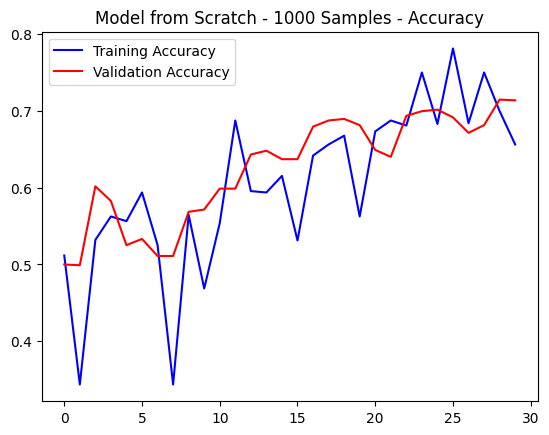

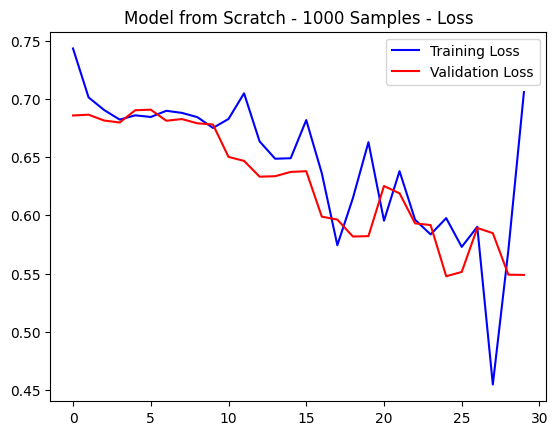

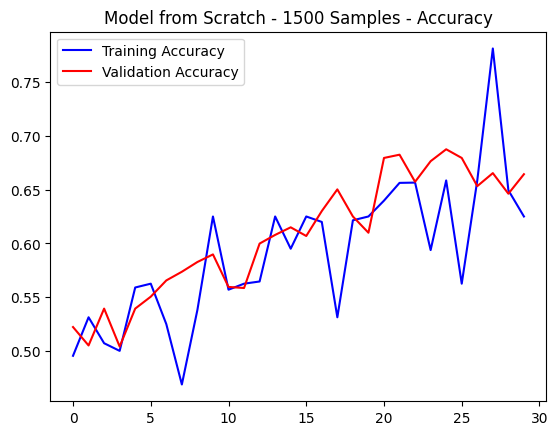

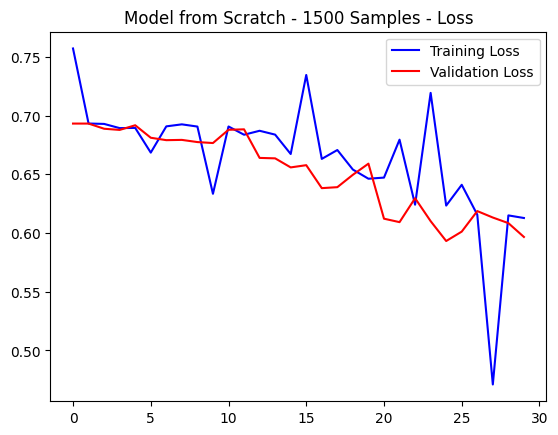

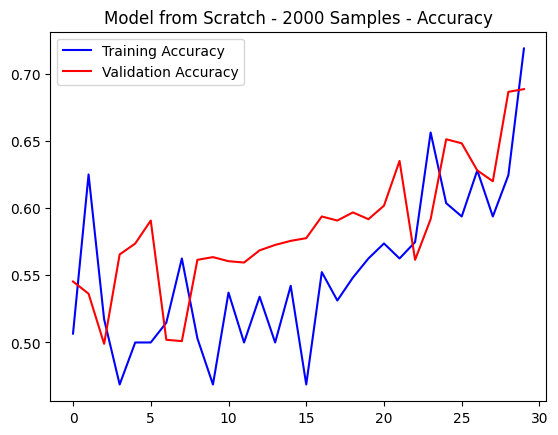

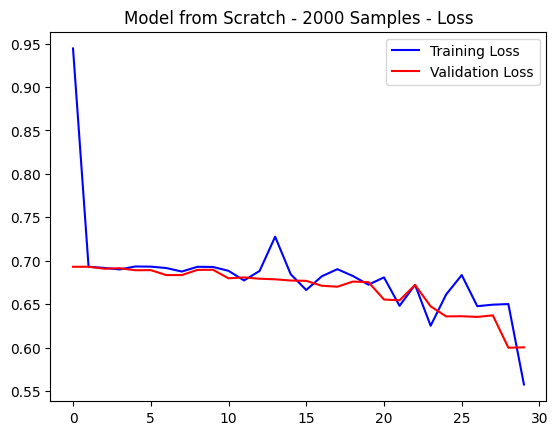

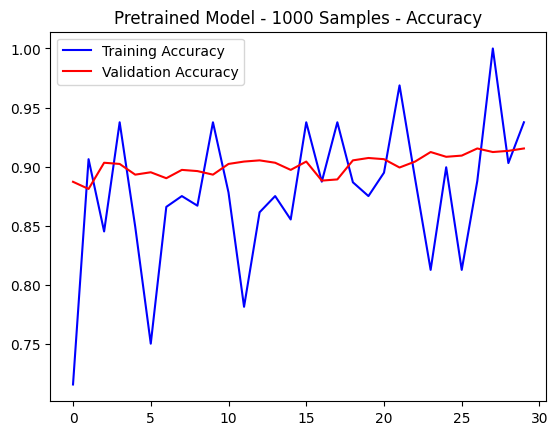

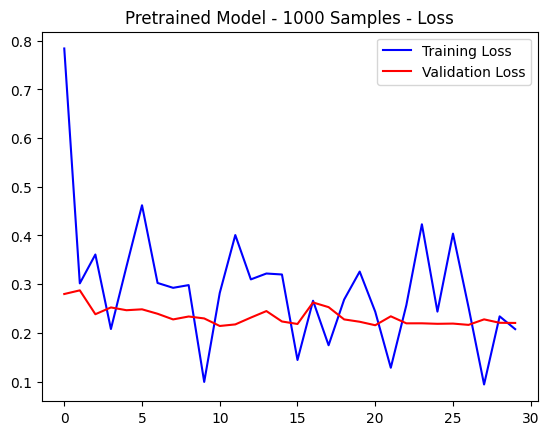

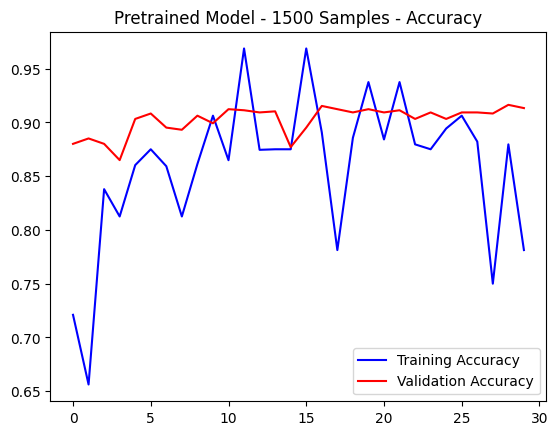

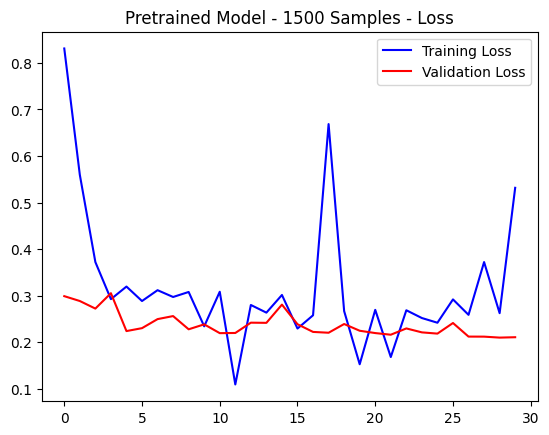

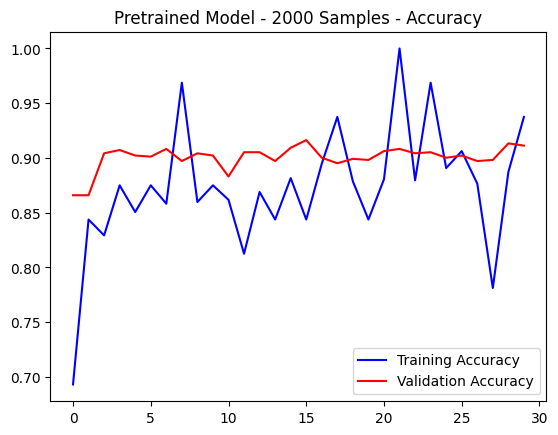

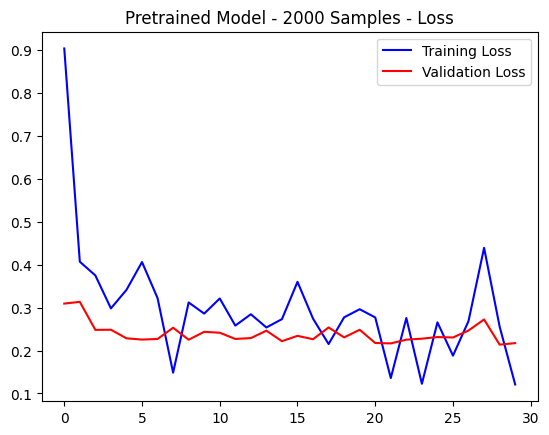

In [40]:
# Function to visualize model performance (accuracy and loss)

def plot_training_metrics(model_history, graph_title):
    train_accuracy = model_history.history['accuracy']  # Extract training accuracy
    val_accuracy = model_history.history['val_accuracy']  # Extract validation accuracy
    train_loss = model_history.history['loss']  # Extract training loss
    val_loss = model_history.history['val_loss']  # Extract validation loss

    epochs = range(len(train_accuracy))

    plt.figure()
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title(graph_title + ' - Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title(graph_title + ' - Loss')
    plt.legend()
    plt.show()

# Plot performance of each model of different samples
plot_training_metrics(history_A, 'Model from Scratch - 1000 Samples')
plot_training_metrics(history_B, 'Model from Scratch - 1500 Samples')
plot_training_metrics(history_C, 'Model from Scratch - 2000 Samples')
plot_training_metrics(history_P1, 'Pretrained Model - 1000 Samples')
plot_training_metrics(history_P2, 'Pretrained Model - 1500 Samples')
plot_training_metrics(history_P3, 'Pretrained Model - 2000 Samples')



In [41]:
def compile_metrics(training_histories, model_names):
    results = {}

    for idx, log in enumerate(training_histories):
        # Extract metrics from the 'history' attribute
        train_acc = log.history['accuracy'][-1]
        val_acc = log.history['val_accuracy'][-1]
        train_loss = log.history['loss'][-1]
        val_loss = log.history['val_loss'][-1]

        results[model_names[idx]] = {
            'Final Training Accuracy': train_acc,
            'Final Validation Accuracy': val_acc,
            'Final Training Loss': train_loss,
            'Final Validation Loss': val_loss,
        }

    return results



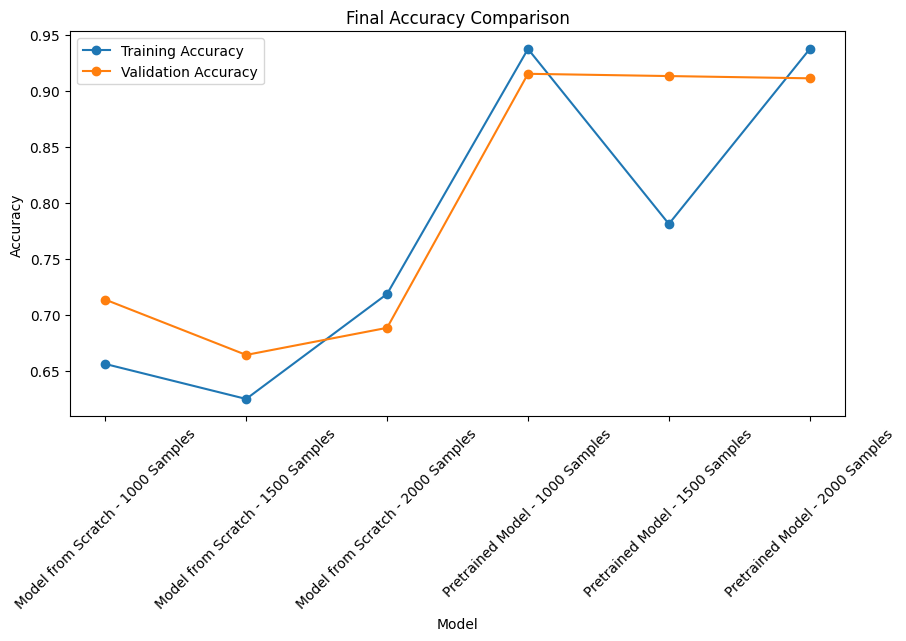

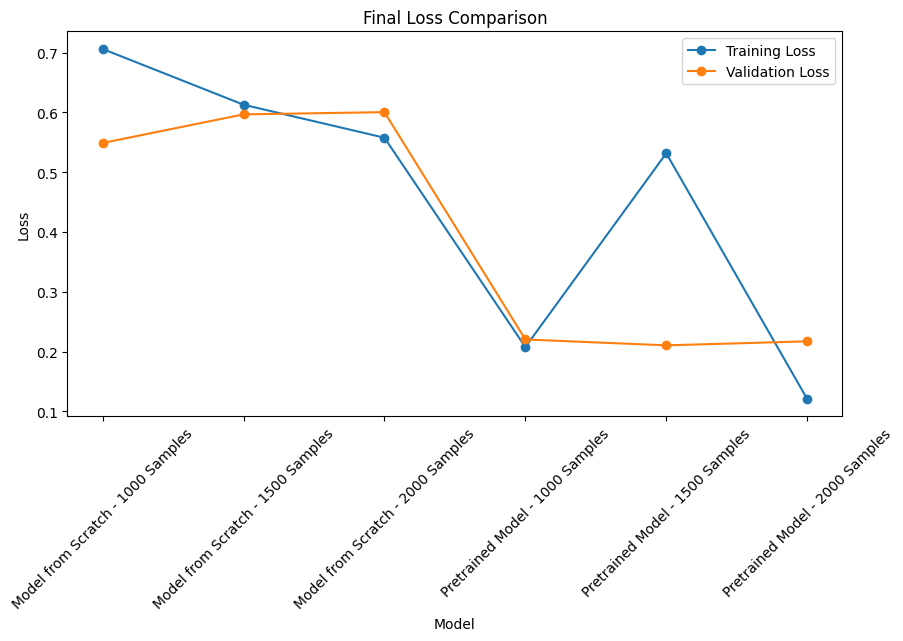

In [42]:
# Compare CNN Model Results

def evaluate_models(summary_data):
    model_names = list(summary_data.keys())
    train_accuracy = [summary_data[name]['Final Training Accuracy'] for name in model_names]
    val_accuracy = [summary_data[name]['Final Validation Accuracy'] for name in model_names]
    train_losses = [summary_data[name]['Final Training Loss'] for name in model_names]
    val_losses = [summary_data[name]['Final Validation Loss'] for name in model_names]

    # Accuracy comparison
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_accuracy, label='Training Accuracy', marker='o')
    plt.plot(model_names, val_accuracy, label='Validation Accuracy', marker='o')
    plt.xticks(rotation=45)
    plt.title('Final Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Loss comparison
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_losses, label='Training Loss', marker='o')
    plt.plot(model_names, val_losses, label='Validation Loss', marker='o')
    plt.xticks(rotation=45)
    plt.title('Final Loss Comparison')
    plt.xlabel('Model')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


all_histories_list = [history_A, history_B, history_C, history_P1, history_P2, history_P3]
model_names_list = [
    'Model from Scratch - 1000 Samples',
    'Model from Scratch - 1500 Samples',
    'Model from Scratch - 2000 Samples',
    'Pretrained Model - 1000 Samples',
    'Pretrained Model - 1500 Samples',
    'Pretrained Model - 2000 Samples'
]

results_summary = compile_metrics(all_histories_list, model_names_list)
evaluate_models(results_summary)
